## **1. Import pandas as pd**


Csv file loaded into pandas dataframe


First 10 rows of the dataset shown

In [1]:
import pandas as pd

house_sales = pd.read_csv("kc_house_data.csv")
print(house_sales[:10])


           id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7 

## **2. Displaying basic information about house_sales dataset**

In [2]:
house_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## **3. Data Cleaning**

#### 3.1. Identifying and handling missing values

From the previous code snippet where the description of the dataframe is shown, we can see that there are a total of 21613 rows of data. Out of the 21613, there are no null values in the columns.

Some columns have the value zero, which explains that the house in question doesn't have that specific feature. So, if the year of renovation is zero, it means the house sold was never renovated.

So, there not being any missing values, I will keep the dataframe unchanged.

#### 3.2. Checking and removing duplicate records

For checking for duplicates, I mainly want to focus on - id, zipcodes and prices.


The id is the unique identifier for each house. So, I want to check first if duplicate ids exist

In [3]:
check_duplicate_ids = house_sales.duplicated('id')
print(check_duplicate_ids)

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool


Since this doesn't clearly give an idea, I want to count each instance of the ids

In [4]:
number_of_ids = house_sales["id"].value_counts()
print(number_of_ids)

id
795000620     3
8651510380    2
2568300045    2
9353300600    2
4139480200    2
             ..
2767603649    1
1446403617    1
5602000275    1
1786200010    1
1523300157    1
Name: count, Length: 21436, dtype: int64


Here we can see that there are ids that are repeated but before removing them, I want to see if they have different zipcodes. although it's not possible for same id to occur through different locations

In [5]:
duplicate_ids = house_sales[house_sales.duplicated("id", keep= False)]
id_group_zipcode = duplicate_ids.groupby('id')['zipcode'].apply(list).reset_index()
print(id_group_zipcode)


             id         zipcode
0       1000102  [98002, 98002]
1       7200179  [98055, 98055]
2     109200390  [98023, 98023]
3     123039336  [98106, 98106]
4     251300110  [98003, 98003]
..          ...             ...
171  9407110710  [98045, 98045]
172  9809000020  [98004, 98004]
173  9828200460  [98122, 98122]
174  9834200305  [98144, 98144]
175  9834200885  [98144, 98144]

[176 rows x 2 columns]


Here I used duplicate_ids to list the ids that are repeated and then grouped those ids to see the corresponding zipcodes

So, for each repeated id, the zipcodes are the same, that means that there are same house information repeated. But we have another variable called price. If price for those repeated ids are same then the rows corresponding to those ids will be removed, and if the prices are different, then it means that the same house was sold again, in which case that entry will be kept.

In [6]:
duplicate_ids = house_sales[house_sales.duplicated("id", keep=False)]
price_check = duplicate_ids.groupby('id')['price'].nunique().reset_index()
price_check.columns = ['id', 'unique_price_count']
same_price_ids = price_check[price_check['unique_price_count'] == 1]['id']
house_sales_filtered = house_sales[~((house_sales['id'].isin(same_price_ids)) & (house_sales.duplicated('id', keep='first')))]


print(house_sales_filtered)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

- duplicate_ids gives the ids that are duplicate

- price_check gives a dataframe of duplicate ids with how many unique price each one has

- price_check.column sets the column names for price_check

- same_price_ids gives the ids that have a single price and house_sales_filtered then removes those rows with duplicate ids that have the same price

#### 3.3. Converting date column with a proper date-time format 

The dates are in the format of Year month date T for time Hour Minute Seconds.

So, I have to use the format %Y%m%d%T%H%M%S for conversion to a proper date-time format.

In [7]:
house_sales_filtered["date"] = pd.to_datetime(house_sales_filtered["date"], format= "%Y%m%dT%H%M%S")
print(house_sales_filtered["date"].head(10))

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
5   2014-05-12
6   2014-06-27
7   2015-01-15
8   2015-04-15
9   2015-03-12
Name: date, dtype: datetime64[ns]


C:\Users\meherin.nushra\AppData\Local\Temp\ipykernel_6816\1118936553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_sales_filtered["date"] = pd.to_datetime(house_sales_filtered["date"], format= "%Y%m%dT%H%M%S")


#### 3.4. Adding derived features 

- total_area = sqft_living + sqft_lot

In [8]:
house_sales_filtered["total_area"] = house_sales_filtered["sqft_living"] + house_sales_filtered["sqft_lot"]
print(house_sales_filtered["total_area"].head(10))

0      6830
1      9812
2     10770
3      6960
4      9760
5    107350
6      8534
7     10771
8      9250
9      8450
Name: total_area, dtype: int64


C:\Users\meherin.nushra\AppData\Local\Temp\ipykernel_6816\377058924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_sales_filtered["total_area"] = house_sales_filtered["sqft_living"] + house_sales_filtered["sqft_lot"]


- price_per_sqft = price/total_area

In [9]:
house_sales_filtered["price_per_sqft"] = house_sales_filtered["price"] / house_sales_filtered["total_area"]
print(house_sales_filtered["price_per_sqft"].head(10))

0    32.489019
1    54.830819
2    16.713092
3    86.781609
4    52.254098
5    11.411272
6    30.173424
7    27.095906
8    24.810811
9    38.224852
Name: price_per_sqft, dtype: float64


C:\Users\meherin.nushra\AppData\Local\Temp\ipykernel_6816\4224332281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_sales_filtered["price_per_sqft"] = house_sales_filtered["price"] / house_sales_filtered["total_area"]


- age_of_house = date - yr_built

to do this, I would have to extract only the year from the date column of the dataset, then substract the year built from it

In [10]:
house_sales_filtered["sale_year"] = house_sales_filtered["date"].dt.year
print(house_sales_filtered["sale_year"].head(10))

0    2014
1    2014
2    2015
3    2014
4    2015
5    2014
6    2014
7    2015
8    2015
9    2015
Name: sale_year, dtype: int32


C:\Users\meherin.nushra\AppData\Local\Temp\ipykernel_6816\3571844368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_sales_filtered["sale_year"] = house_sales_filtered["date"].dt.year


In [11]:
house_sales_filtered["house_age"] = house_sales_filtered["sale_year"] - house_sales_filtered["yr_built"]
print(house_sales_filtered["house_age"].head(10))

0    59
1    63
2    82
3    49
4    28
5    13
6    19
7    52
8    55
9    12
Name: house_age, dtype: int64


C:\Users\meherin.nushra\AppData\Local\Temp\ipykernel_6816\2965549176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_sales_filtered["house_age"] = house_sales_filtered["sale_year"] - house_sales_filtered["yr_built"]


- avg_total_area_nearby_houses = sqft_living15 + sqft_lot15

the sqft_lot15 and sqft_living15 reperesent the avg area of 15 nearby houses.

In [12]:
house_sales_filtered["avg_total_area_nearby_houses"] = house_sales_filtered["sqft_living15"] + house_sales_filtered["sqft_lot15"]

C:\Users\meherin.nushra\AppData\Local\Temp\ipykernel_6816\1505571512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_sales_filtered["avg_total_area_nearby_houses"] = house_sales_filtered["sqft_living15"] + house_sales_filtered["sqft_lot15"]


#### 3.5. Identifying and handling outliers

First I will select specific columns to find if outliers exist

Then I will use histogram to find out how the data in those columns are distributed - normally, non-normal or skewed

This helps to figure out which method is best suited to find outliers for different columns

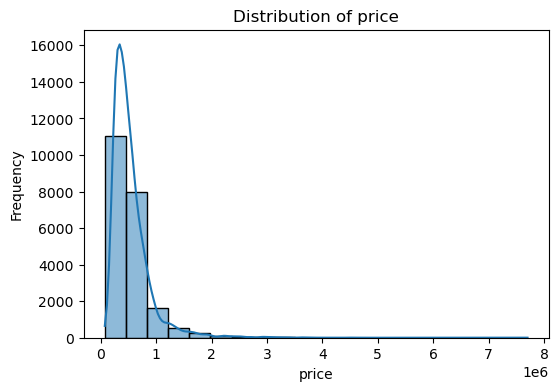

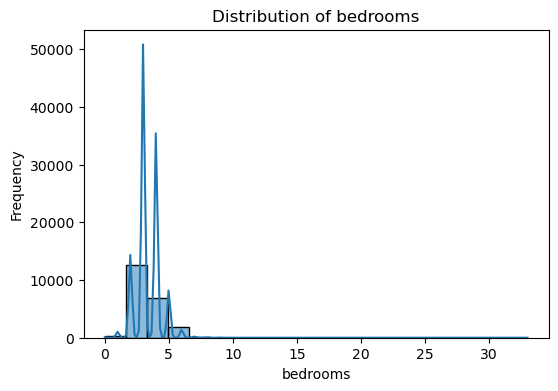

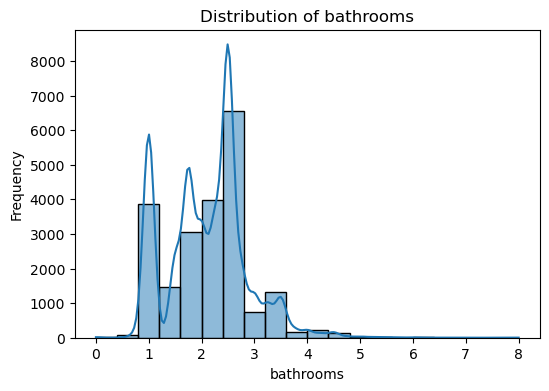

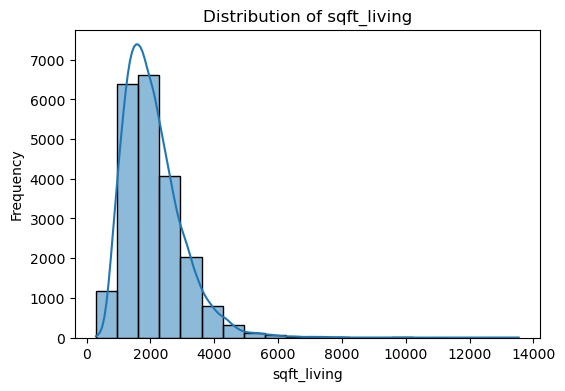

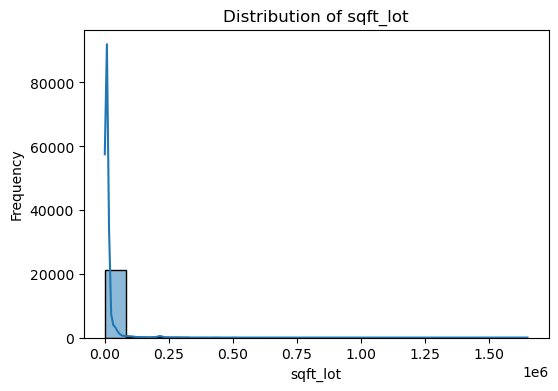

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

columns_chosen = ["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot"]

selected_columns = house_sales_filtered[columns_chosen]

for col in selected_columns.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(house_sales_filtered[col], bins = 20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



According to the histograms - price, bedrooms, sqft_living and sqft_lot - are right skewed. This means that data for these columns are non-normal.

The best method to find outliers of non-normal or skewed data in Interquartile range.

I will write a method for finding the outliers using IQR and instead of removing the outliers, I want to adjust the values.

I want to keep the outlier values so that data isn't lost

In [14]:
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[column] = data[column].clip(lower, upper)
    # data[(data[column] >= lower) & (data[column] <= upper)]
    return data

house_sales_clipped = house_sales_filtered.copy()
for col in ["price", "sqft_living", "sqft_lot", "bedrooms", "bathrooms", "floors"] :
    house_sales_clipped = outliers(house_sales_clipped, col)


- total_rooms = bedrooms + bathrooms

In [15]:
house_sales_clipped["total_rooms"] = house_sales_clipped["bedrooms"] +house_sales_clipped["bathrooms"]

## **5. Data Exploratory Analysis**

#### 5.1. Summary statistics of all numerical features

In [16]:
house_sales_clipped.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,total_area,price_per_sqft,sale_year,house_age,avg_total_area_nearby_houses,total_rooms
count,2.161000e+04,21610,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,...,21610.000000,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,2014-10-29 04:31:28.459046912,5.116069e+05,3.362795,2.098456,2058.116566,8705.868388,1.494239,0.007543,0.234197,...,47.560049,-122.213910,1986.518695,12769.031976,1.718817e+04,59.708236,2014.322952,43.319343,14755.550671,5.461251
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,1.500000,0.625000,290.000000,520.000000,1.000000,0.000000,0.000000,...,47.155900,-122.519000,399.000000,651.000000,1.423000e+03,0.163020,2014.000000,-1.000000,1721.000000,2.125000
25%,2.123049e+09,2014-07-22 00:00:00,3.216125e+05,3.000000,1.750000,1425.500000,5040.000000,1.000000,0.000000,0.000000,...,47.470925,-122.328000,1490.000000,5100.000000,7.035250e+03,28.128755,2014.000000,18.000000,6979.250000,4.500000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7619.000000,1.500000,0.000000,0.000000,...,47.571800,-122.231000,1840.000000,7620.000000,9.575000e+03,46.839923,2014.000000,40.000000,9460.000000,5.500000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,10688.750000,2.000000,0.000000,0.000000,...,47.678000,-122.125000,2360.000000,10083.000000,1.300000e+04,78.015284,2015.000000,63.000000,12232.000000,6.500000
max,9.900000e+09,2015-05-27 00:00:00,1.130081e+06,5.500000,3.625000,4236.750000,19161.875000,3.500000,1.000000,4.000000,...,47.777600,-121.315000,6210.000000,871200.000000,1.652659e+06,400.964599,2015.000000,115.000000,874620.000000,9.125000
std,2.876547e+09,NaN,2.500855e+05,0.854146,0.722063,839.515281,5047.069586,0.539994,0.086523,0.766136,...,0.138572,0.140833,685.425781,27305.972464,4.159181e+04,45.607880,0.467615,29.374751,27439.813224,1.379176


#### 5.2. Analyzing the distribution of target variable, price, using visualization techniques

Histogram of the prices column

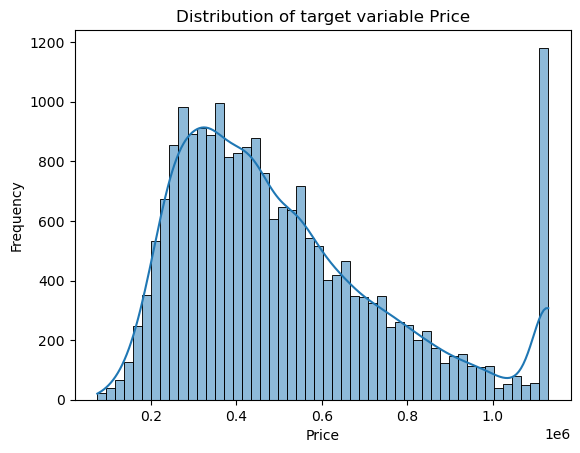

In [17]:
sns.histplot(house_sales_clipped['price'], bins=50, kde=True)
plt.title("Distribution of target variable Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

- Histogram shows the data to be right skewed

- Mode is the bar with the highest frequency. This is the right most bar. So, it means that the number of expensive houses are more.

- Since the data is skewed, the mean, median and mode are different. Mean and median, both are towards the tail of the histogram, which means that on average, the price of a house is 5116069 dollars.

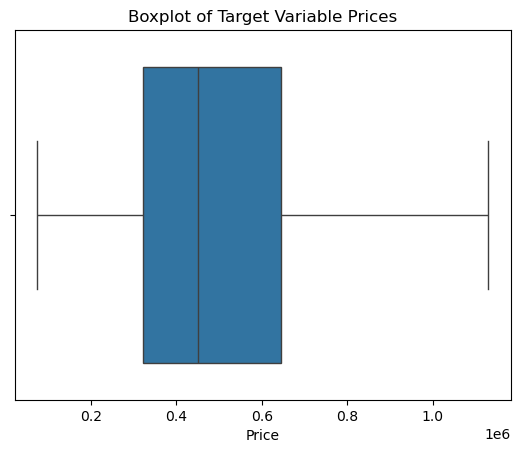

In [18]:
sns.boxplot(x=house_sales_clipped['price'])
plt.title("Boxplot of Target Variable Prices")
plt.xlabel("Price")
plt.show()

- From the boxplot, it is seen that there are no outliers

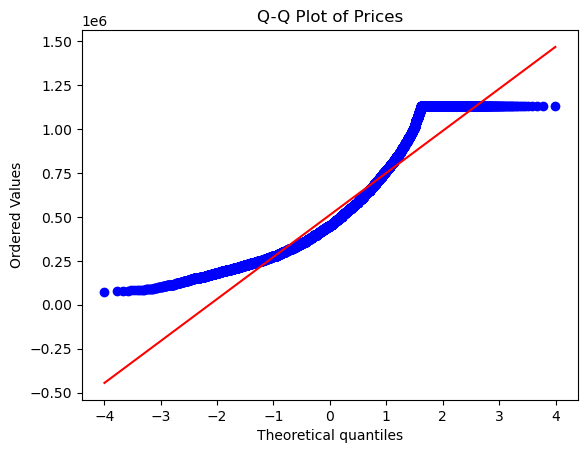

In [19]:
import scipy.stats as stats

stats.probplot(house_sales_clipped['price'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Prices")
plt.show()

- Since the points are outside the line, the data isn't normally distributed. The data infact has some extreme values

- The data values at the left end seem to suggest lower extreme values than the theoretical ones.

- The right end or upper tail is more compressed, as the data was capped

#### 5.3. Exploring relationships between house prices and key features

- Price vs total_rooms

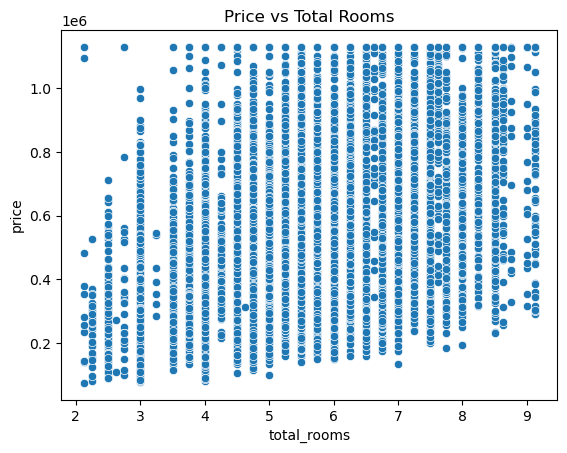

In [20]:
sns.scatterplot(x='total_rooms', y='price', data=house_sales_clipped)
plt.title('Price vs Total Rooms')
plt.show()

- a scatterplot for price vs total rooms isn't giving a clear idea. So, I will use a bar plot

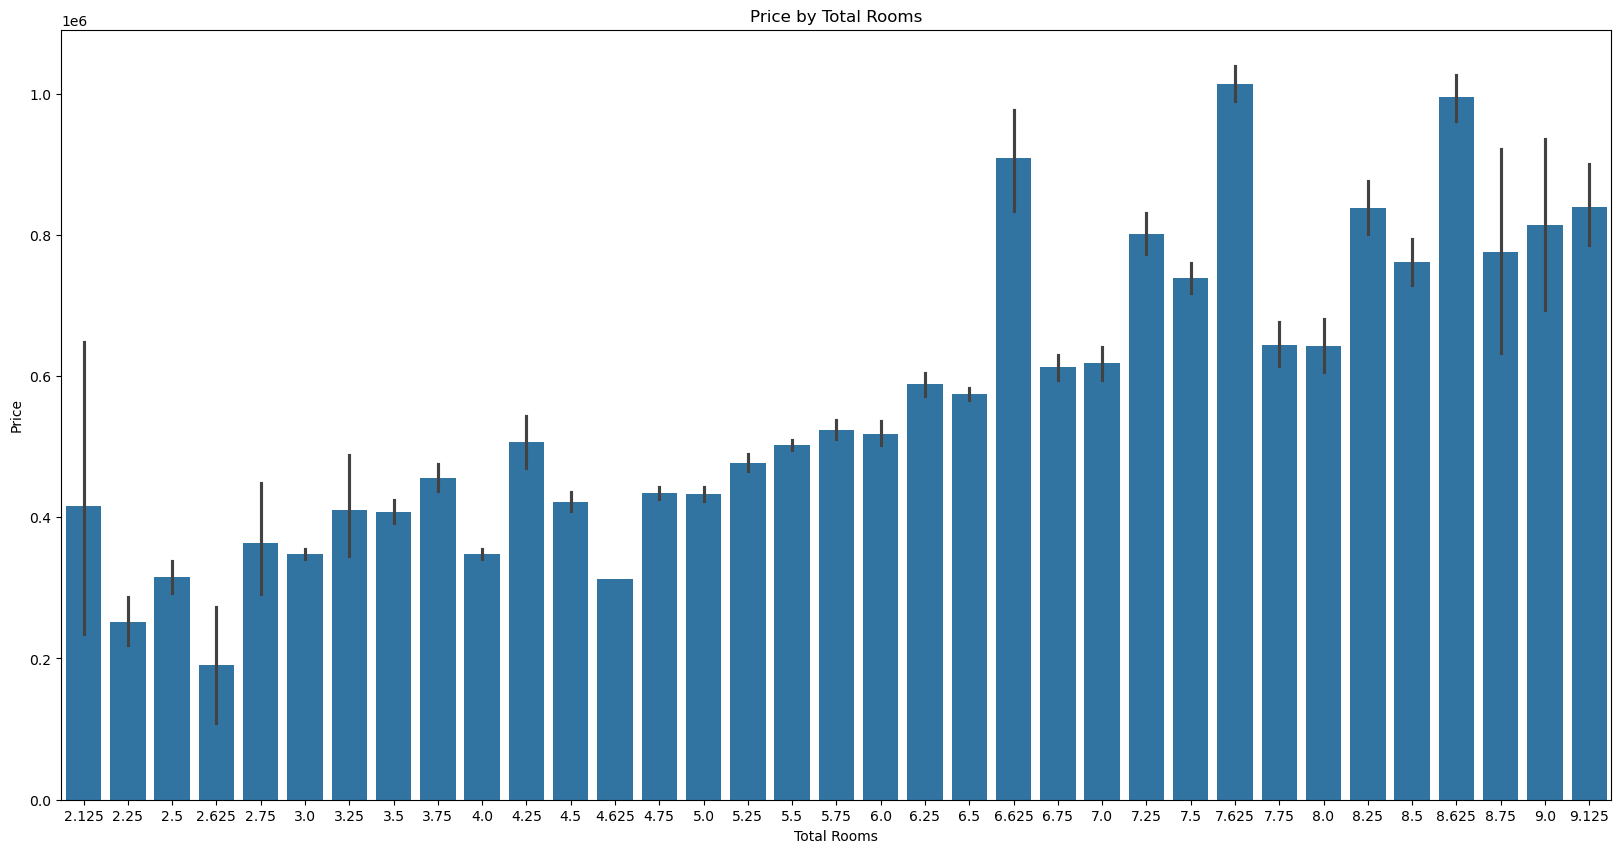

In [21]:
plt.figure(figsize=(20,10))
sns.barplot(x='total_rooms', y='price', data=house_sales_clipped)
plt.title('Price by Total Rooms')
plt.xlabel('Total Rooms')
plt.ylabel('Price')
plt.show()


- Here, we get a better idea about the relationship between price and total rooms.

we can see a few exceptions, where for less rooms the price of the house is more compared to ones with more rooms. This can be due to other factors, like - view, location etc.
In general, the price seems to increase with number of rooms

- Price vs total area

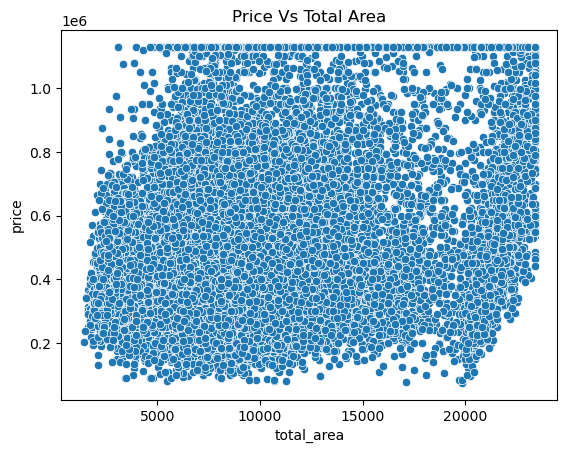

In [22]:
house_sales_clipped["total_area"] = house_sales_clipped["sqft_living"] + house_sales_clipped["sqft_lot"]
house_sales_clipped["price_per_sqft"] = house_sales_clipped["price"] / house_sales_clipped["total_area"]

sns.scatterplot(x="total_area", y="price", data= house_sales_clipped)
plt.title("Price Vs Total Area")
plt.show()


- A scatter plot is not giving a clear idea about the relationship between total area and price

- the points are overlapping and are very dense. This is likely because of the large values of sqft_living and sqft_lot combined.

- I am going to plot sqft_living and sqft_lot against price

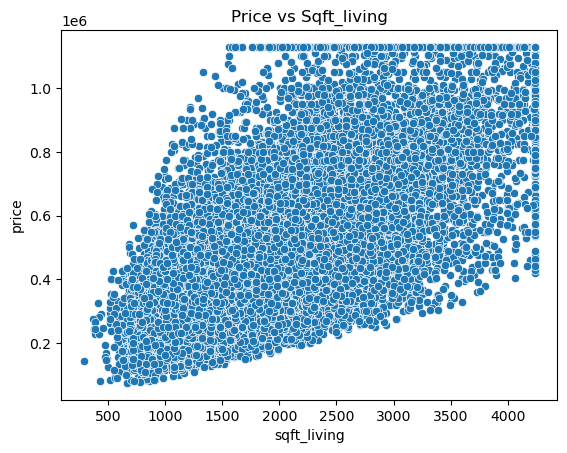

In [23]:
sns.scatterplot(x= "sqft_living", y= "price", data= house_sales_clipped)
plt.title("Price vs Sqft_living")
plt.show()

- Now a trend can be seen. With few exceptions, with the increase in sqft_living, the price seems to also increase.

- We can see that there are houses with different sqft_living and houses which have same sqft_living but different prices. This is again due to other contributing factors and also because of capping of the sqft_living values.

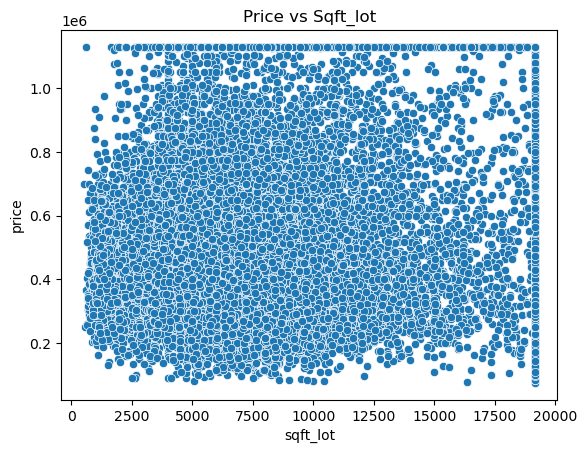

In [24]:
sns.scatterplot(x= "sqft_lot", y= "price", data= house_sales_clipped)
plt.title("Price vs Sqft_lot")
plt.show()

- this doesn't show a clear pattern. The points are more scattered and dense.

- Let's check with a line plot and regression plot and also log scale both the axis

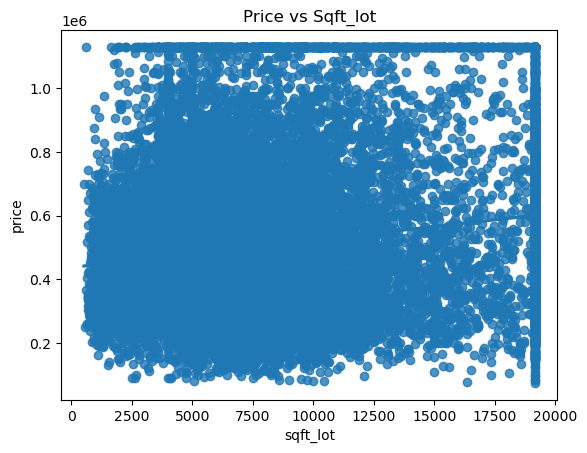

In [25]:
sns.regplot(x= "sqft_lot", y= "price", data= house_sales_clipped)
plt.title("Price vs Sqft_lot")
plt.show()

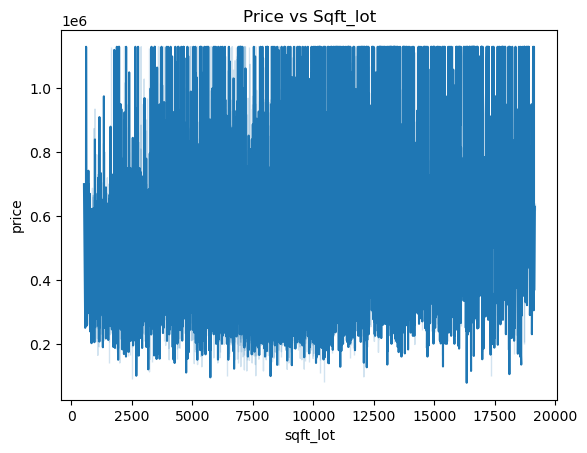

In [26]:
sns.lineplot(x= "sqft_lot", y= "price", data= house_sales_clipped)
plt.title("Price vs Sqft_lot")
plt.show()

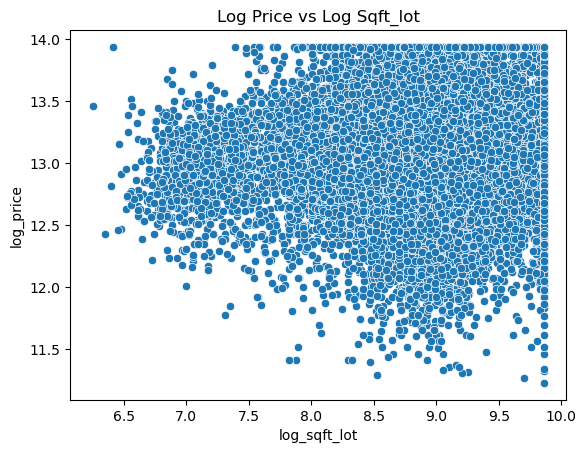

In [27]:
house_sales_clipped["log_price"] = np.log(house_sales_clipped["price"])
house_sales_clipped["log_sqft_lot"] = np.log(house_sales_clipped["sqft_lot"])

sns.scatterplot(x="log_sqft_lot", y="log_price", data = house_sales_clipped)
plt.title("Log Price vs Log Sqft_lot")
plt.show()

- with the log of both the axis, the relationship between sqft_lot and price show similar traits to sqft_living vs price

- price vs floors

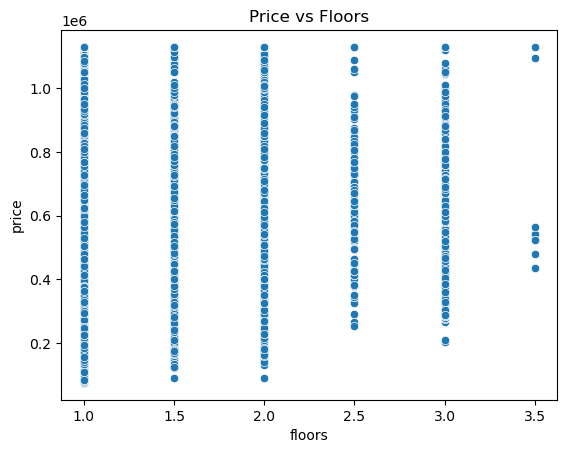

In [28]:
sns.scatterplot(x= "floors", y= "price", data= house_sales_clipped)
plt.title("Price vs Floors")
plt.show()

- there seems to be no distinct relationship between number of floors and house prices

- Price vs waterfront
- Price vs view
- Price vs Grade
- Price vs zipcode

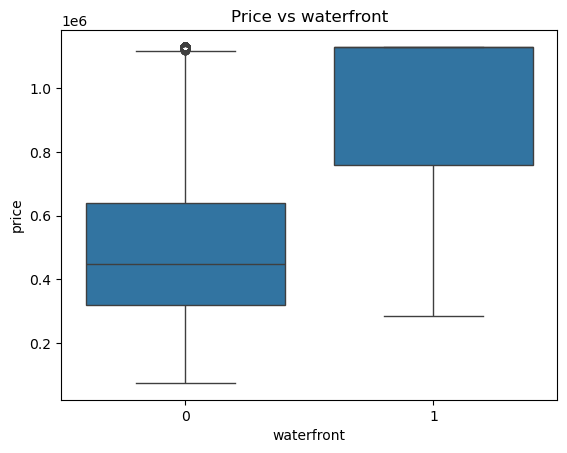

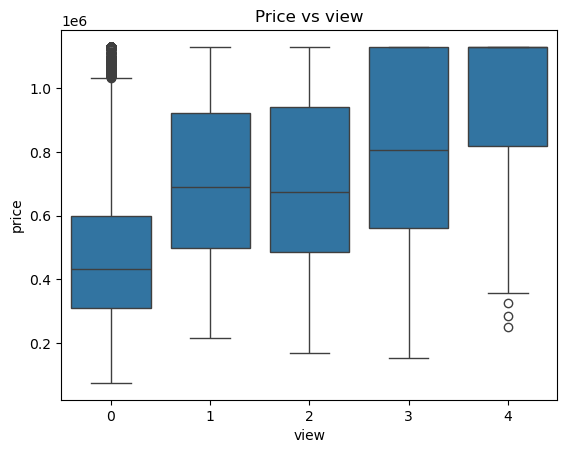

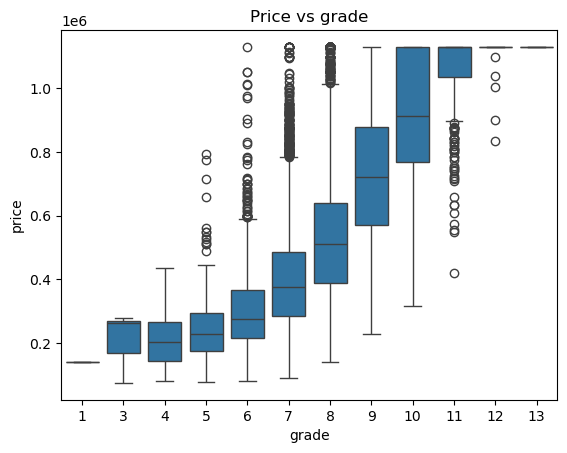

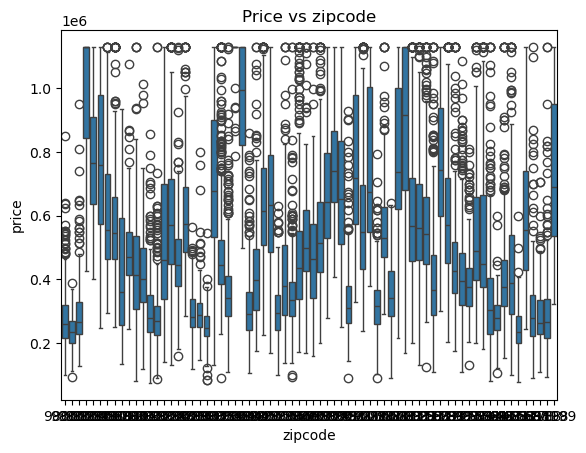

In [29]:
for category in ["waterfront", "view", "grade", "zipcode"] :
   sns.boxplot(x=category, y='price', data=house_sales_clipped)
   plt.title('Price vs '+ category)
   plt.show()


**Price vs Waterfront (Waterfront = 0 , houses with no waterfront)**
- median price of houses with no waterfront is 45k
- the Interquartile range is : 30k-65k, suggesting that, most houses with no waterfront are priced in that range.
- few outliers exist that lie well above the iqr, which means that there are houses priced well above the iqr. This might happen due to other key factors.

**Price vs Waterfront (waterfront = 1, houses with waterfront)**
- median price of houses with waterfront is way above than the ones with no waterfront
- the iqr is : 78k-115k, suggesting that most of the houses are priced so high due to the presence of a waterfront
- no outliers are seen.


**Price vs View**
- Most houses are priced higher as view quality increases.
- Houses with no view(view = 0), are priced lower compared to the ones with better view.
- Outliers are present for view =0 and view = 4
- So, there are houses that cost a lot despite having no view and there are also houses that cost less even though the view is increadible.
- This might be due to the location of the houses or living conditions.

**Price vs Grade**
- Grade is the living condition of the house.
- the value of it ranges from 0-13. O being the worst and 13 being the most luxurious.
- there are very few houses with grades 0,12 and 13.
- mean house price is more with higher grade.
- houses with grade 10 have a higher ranger, starting from 30k.
- outliers exist for houses with grade - 5,6,7,8,11 and 12
- which means there are houses priced high for poor grade and vice versa. The economic state and population of the area might be contributing factors for this

**Price vs Zipcode**
- a box plot isn't suitable for price vs zipcode.
- the plot is too dense as there are too many zipcodes.
- I will try it with a violin plot to see if the price trend with location comes out a bit smoother.

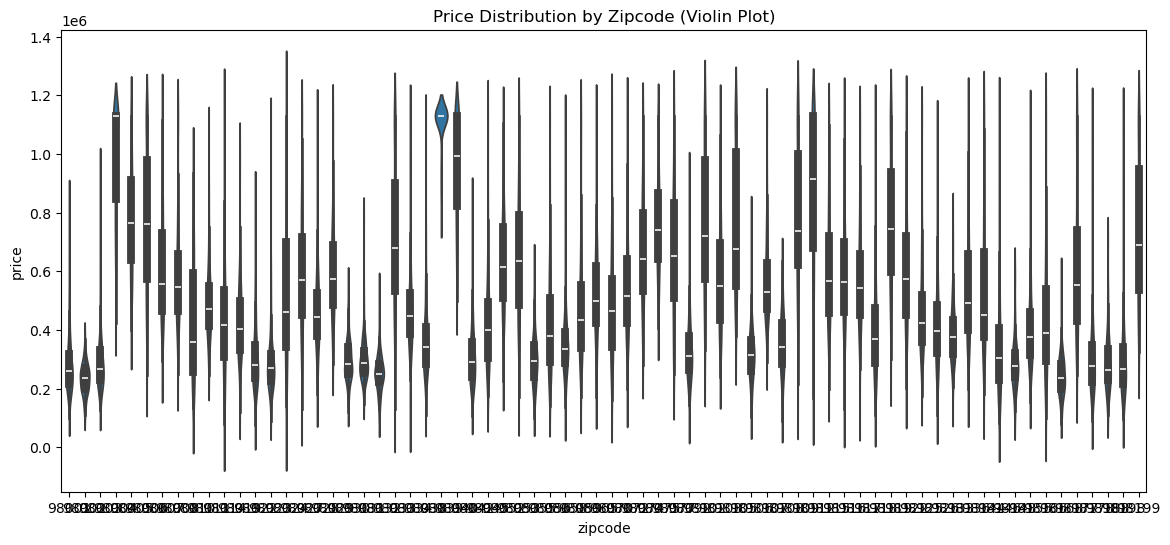

In [30]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=house_sales_clipped, x='zipcode', y='price')
plt.title('Price Distribution by Zipcode (Violin Plot)')
plt.show()


- still the plot is quite hard to read.
- heatmaps can be helpful in this case, and we also have lattitude and longitude data.
- a heatmap uses color gradients to point out concentration of data. Darker color is high concentration and lighter colors is low concentration.
- this would give us a better understanding of the house price distribution according to location.

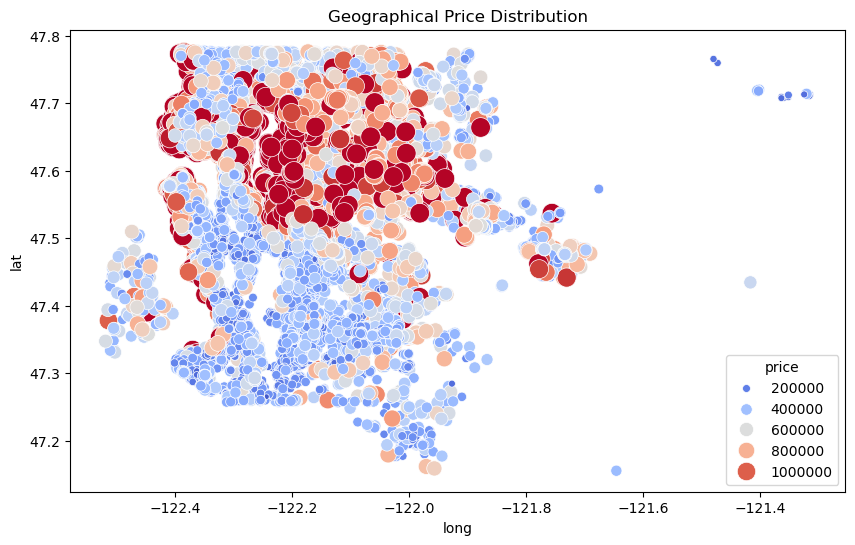

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=house_sales_clipped, x='long', y='lat', hue='price', palette='coolwarm', size='price', sizes=(10, 200))
plt.title('Geographical Price Distribution')
plt.show()


- this is a simpler form of heatmap
- even though this scatterplot gives us a picture of price distribution across different locations, it's not a clear. The points are dense and overlap.
- it does however, tell us that a particular area in King's County has more expensive houses than others.
- folium is imported to be able to plot an interactive heatmap
- the house prices are first normalized, so that they range from 0 to 1. This helps with the scale of heat intensity
- a folium map is plotted by focusing on the King's County area of USA
- then a layer of heatmap is added to that map

In [32]:
import folium
from folium.plugins import HeatMap

house_sales_clipped['price_normalized'] = house_sales_clipped['price'] / house_sales_clipped['price'].max()

#Map with King County as focus
m = folium.Map(location=[47.5, -122.2], zoom_start=9)

# list of points for heatmap
heat_data = [[row['lat'], row['long'], row['price']] for index, row in house_sales_clipped.iterrows()]

HeatMap(heat_data, radius=10).add_to(m)

m

- This gives a much clearer idea about the price distribution across locations
- the warmer tone colors are for high prices.
- so, we can see that in a particular location, the ones marked by yellow, the house prices are the most expensive.

#### **Time Trend in house prices over the period covered by the dataset**
- I want to group the prices by the year.
- so, for each year, grouped average price will be taken
- I have chosen to do a line plot for this
- as this would properly show the trend

C:\Users\meherin.nushra\AppData\Local\Temp\ipykernel_6816\1206640398.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_price_avg = house_sales_clipped.resample('Y', on='date')['price'].mean().reset_index()


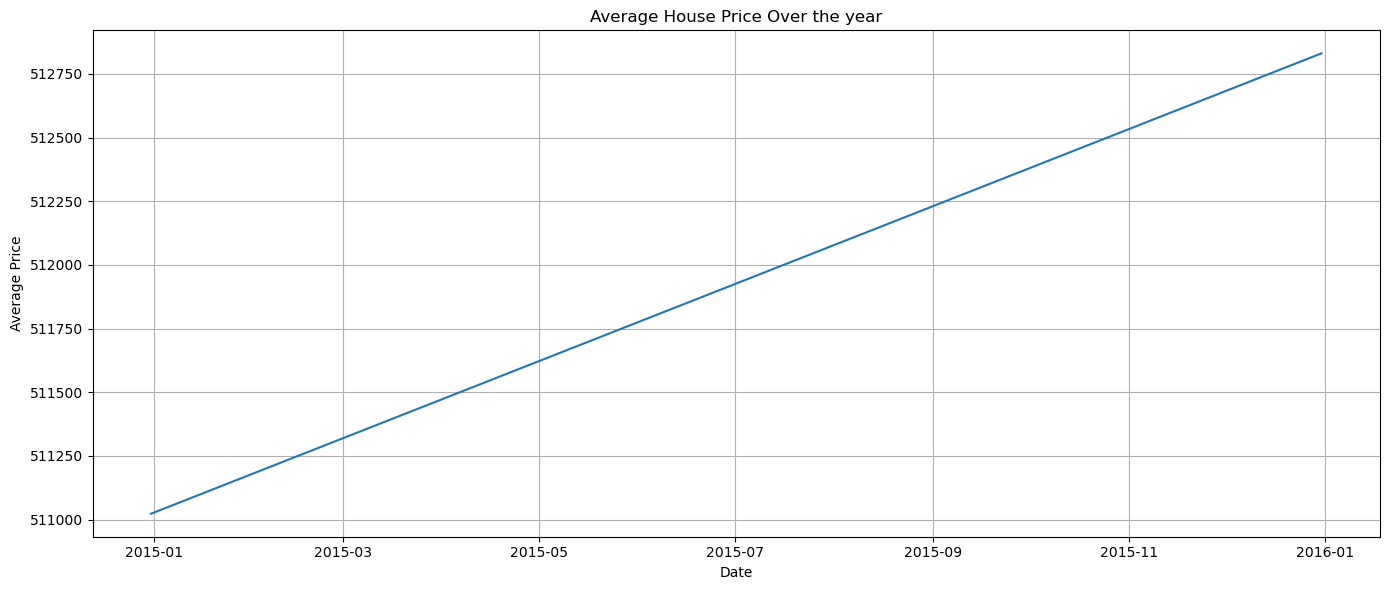

In [33]:
yearly_price_avg = house_sales_clipped.resample('Y', on='date')['price'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=yearly_price_avg, x="date", y="price", markers="o")
plt.title('Average House Price Over the year')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.tight_layout()
plt.show()

- it shows a steady clean increase in average price over the years.

#### **Mean, median and mode for price, total_area, price_per_sqft, house_age**


In [34]:
stats = ["price", "total_area", "price_per_sqft", "house_age"]

house_sales_clipped[stats].describe()

    

,price,total_area,price_per_sqft,house_age
count,2.161000e+04,21610.000000,21610.000000,21610.000000
mean,5.116069e+05,10763.984955,59.644974,43.319343
std,2.500855e+05,5397.411171,42.083278,29.374751
min,7.500000e+04,1423.000000,3.781791,-1.000000
25%,3.216125e+05,7035.250000,29.953008,18.000000
50%,4.500000e+05,9570.500000,47.584535,40.000000
75%,6.450000e+05,12981.000000,75.986919,63.000000
max,1.130081e+06,23398.625000,381.492798,115.000000


#### **T-test to see if there is a significant difference in price based on bedrooms and total_area**
- a t-test compares the average of two groups and checks if they are statistically different


- I want to count the different bedroom numbers


In [36]:
house_sales_clipped['bedrooms'].value_counts()

bedrooms
3.0    9822
4.0    6881
2.0    2760
5.0    1601
5.5     334
1.5     212
Name: count, dtype: int64

- here there are two values that are decimal. That's is occuring as the bedroom values were clipped due to outliers.
- So, I will take three groups, (2,3) (3,4) (4,5)

In [37]:
from scipy.stats import ttest_ind


group_1_bed = house_sales_clipped[house_sales_clipped['bedrooms'] == 2]['price']
group_2_bed = house_sales_clipped[house_sales_clipped['bedrooms'] == 3]['price']
group_3_bed = house_sales_clipped[house_sales_clipped['bedrooms'] == 4]['price']
group_4_bed = house_sales_clipped[house_sales_clipped['bedrooms'] == 5]['price']

# Perform independent t-test
t_stat_bed1, p_val_bed1 = ttest_ind(group_1_bed, group_2_bed, equal_var=False)
t_stat_bed2, p_val_bed2 = ttest_ind(group_2_bed, group_3_bed, equal_var=False)
t_stat_bed3, p_val_bed3 = ttest_ind(group_3_bed, group_3_bed, equal_var=False)

print("T-Test: Price comparison (2-bedrooms vs 3-bedrooms)")
print(f"T-statistic = {t_stat_bed1:.3f}, p-value = {p_val_bed1:.3f}")


print("T-Test: Price comparison (3-bedrooms vs 4-bedrooms)")
print(f"T-statistic = {t_stat_bed2:.3f}, p-value = {p_val_bed2:.3f}")

print("T-Test: Price comparison (4-bedrooms vs 5-bedrooms)")
print(f"T-statistic = {t_stat_bed3:.3f}, p-value = {p_val_bed3:.3f}")

T-Test: Price comparison (2-bedrooms vs 3-bedrooms)
T-statistic = -14.286, p-value = 0.000
T-Test: Price comparison (3-bedrooms vs 4-bedrooms)
T-statistic = -36.389, p-value = 0.000
T-Test: Price comparison (4-bedrooms vs 5-bedrooms)
T-statistic = 0.000, p-value = 1.000


- for the first group, **t-statistics** value is negative, suggesting that 3 bedroom houses are way more expensive than two bedroom houses. The **p-value** is less than 0.05, which means that this difference is significant and not by chance.
- for the second group, the **t-statistics** value is a bigger negative number compared to the first group, suggesting that the price difference between a 4 bedroom house and a 3bedroom house is greater. A 4bedroom house is a lot more times expensive. The **p-value** is also below 0.05, so the difference is significant.
- the last group shows that the **t-statistics** score is 0 and the **p-value** is 1. This means there is no difference in prices between the two groups and that this is probably by chance. Statistically there is no difference between them.
- compared to the previous groups and their data size, group five has a lower number of data. So, because of that the t-test values came out that way. Otherwise it might have been because the data points are dense.

In [38]:
house_sales_clipped["total_area"].head(10)

0     6830.000
1     9812.000
2    10770.000
3     6960.000
4     9760.000
5    23398.625
6     8534.000
7    10771.000
8     9250.000
9     8450.000
Name: total_area, dtype: float64

- for the total_area, I take 10k as the base for making two groups
- one group is above or equal to 10k total_area
- another group is below 10k

In [40]:
group_below = house_sales_clipped[house_sales_clipped['total_area'] < 10000]['price']
group_above = house_sales_clipped[house_sales_clipped['total_area'] >= 10000]['price']

t_stat_area, p_val_area = ttest_ind(group_below, group_above, equal_var=False)

print("\nT-Test: Price comparison (sqft < 10000 vs sqft ≥ 10000)")
print(f"T-statistic = {t_stat_area:.3f}, p-value = {p_val_area:.3f}")



T-Test: Price comparison (sqft < 10000 vs sqft ≥ 10000)
T-statistic = -29.294, p-value = 0.000


- the **t-statistics** value is a high negative number, which means that the price difference between the two groups is pretty high.
- so, the houses with total area greater than 10k has a significantly higher price.
- since, **p-value** is 0, so this occurance is not by chance.

#### This is the end of the project
- I am just a beginner in this field so I took this as a learning project
- I used google and chargpt to understand certain terminologies to help break down the plots 
- I also took help in finding out the code notation for certain plots.